# AFC  sur données quantitatives

## Mastère ESD - Introduction au Machine Learning

> Idée : travailler sur les profils plutôt que sur les données brutes, lors de l'analyse d'un tableau individus décrits par des variables, avec comme contraintes :

- Les sommes en lignes ont un sens
- Les sommes en colonnes ont un sens
- Toutes les données sont strictement positives

## Librairies utilisés

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import CA

## Données utilisées

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de l'AFC

In [4]:
ca = CA(n_components = 3) # car 4 variables et 150 individus (donc max - 1)
ca.fit(iris2)

## Calcul des valeurs propres

In [5]:
print(ca.eigenvalues_)
print(ca.total_inertia_)
print(ca.percentage_of_variance_) # CHANGEMENT ICI

[0.06128739 0.00220034 0.0006302 ]
0.064117937841953
[95.58540313  3.43171393  0.98288294]


In [6]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(3)],
        "% variance expliquée": numpy.round(ca.percentage_of_variance_, 2),
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(ca.percentage_of_variance_), 2)
    }
)
eig

,Dimension,% variance expliquée,% variance expliquée cumulée
0,Dim1,95.59,95.59
1,Dim2,3.43,99.02
2,Dim3,0.98,100.00


## Choix du nombre de facteurs

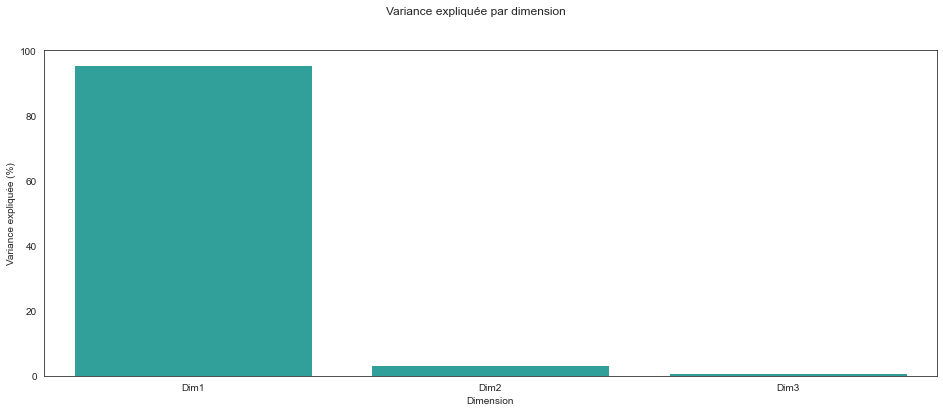

In [7]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "lightseagreen",
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Représentation des individus

In [8]:
df_row = pandas.DataFrame(ca.row_coordinates(iris2)).rename(columns = {0: "Dim1", 1: "Dim2"})
df_row

,Dim1,Dim2,2
0,0.447771,-0.001109,0.002377
1,0.406697,0.040867,0.032930
2,0.440354,-0.001524,0.006163
3,0.399439,0.015391,-0.015986
4,0.455915,-0.017940,-0.015344
...,...,...,...
145,-0.186885,-0.064138,0.048744
146,-0.196498,-0.001004,0.037839
147,-0.166144,-0.031811,0.014064
148,-0.181649,-0.100405,-0.010732


## Représentations des variables

In [9]:
df_col = pandas.DataFrame(ca.column_coordinates(iris2)).rename(columns = {0: "Dim1", 1: "Dim2"})
df_col

/usr/local/lib/python3.9/site-packages/prince/ca.py:206: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  is_sparse = X.dtypes.apply(pd.api.types.is_sparse).all()


,Dim1,Dim2,2
Sepal Length,0.101969,0.030748,0.022061
Sepal Width,0.307606,-0.049783,-0.023314
Petal Length,-0.271280,0.027773,-0.026760
Petal Width,-0.430926,-0.109925,0.035795


## Représentation conjointe

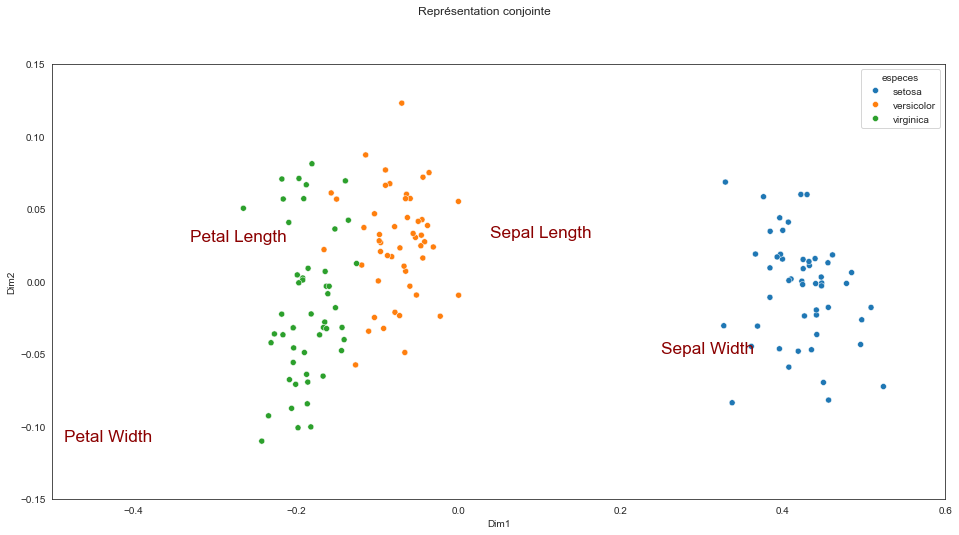

In [10]:
fig = plt.figure(figsize = (16,8)); plt.xlim(-.5, .6); plt.ylim(-.15, .15)

seaborn.scatterplot(data = df_row.assign(especes = iris.Species),
                    x = "Dim1", y = "Dim2", hue = "especes")

for i in df_col.index:
    plt.text(df_col.loc[i].Dim1, df_col.loc[i].Dim2, i, size = "xx-large", color = "darkred", ha = "center")

fig.suptitle("Représentation conjointe")
plt.show()